__Distribute stations for SPECFEM modelling over central europe__

Daniel Köhn

Kiel, 22.01.2018

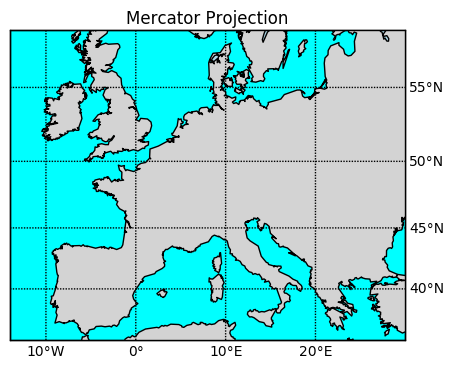

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

minlat = 35.5
maxlat = 58.5

minlon = -14
maxlon = 30

# resolution = 'c' -> low resolution coastlines
# resolution = 'l' -> high resolution coastlines
m = Basemap(projection = 'merc', llcrnrlat=minlat, urcrnrlat=maxlat,
        llcrnrlon=minlon, urcrnrlon=maxlon, resolution='l')

m.drawcoastlines()
m.fillcontinents (color='lightgray', lake_color='lightblue')
m.drawparallels(np.arange(35,60,5.),labels=[0,1,0,0])
m.drawmeridians(np.arange(-10,30,10.),labels=[0,0,0,1])
m.drawmapboundary(fill_color='aqua')

m.drawcounties()

plt.title('Mercator Projection')
plt.show()

__Define receiver positions evenly distributed over europe__

In [2]:
# define longitude and latitude positions of receivers
drec = 0.45   # receiver distance [degree]
lat_rec = np.arange(minlat, maxlat, drec)
lon_rec = np.arange(minlon, maxlon, drec)

nrec = lat_rec.size * lon_rec.size

# allocate memory for each receiver position
pos_lat = np.zeros(nrec, dtype=[('var1', float)])
pos_lon = np.zeros(nrec, dtype=[('var1', float)])

h = 0
for i in range(0,lat_rec.size,1):
    for j in range(0,lon_rec.size,1):

        pos_lat[h] = lat_rec[i]
        pos_lon[h] = lon_rec[j]
        h = h + 1        

outfile = open('STATIONS', 'w')
h = 0
for i in range(0,lat_rec.size,1):
    for j in range(0,lon_rec.size,1):
        
        tmp = pos_lat[h]
        tmp1 = pos_lon[h]        
        
        outfile.write("H" + "%0.*f" %(0,np.fix(i)) + "R" + "%0.*f" %(0,np.fix(j)))
        outfile.write("\t")
        outfile.write("EU")
        outfile.write("\t")
        outfile.write(str(tmp.astype('str')))
        outfile.write("\t")
        outfile.write(str(tmp1.astype('str')))
        outfile.write("\t")
        outfile.write(str( 0.0 ))
        outfile.write("\t")
        outfile.write(str( 0.0 ))
        outfile.write("\n")
        
        h = h + 1
outfile.close()